In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from time import sleep
from scipy.stats import linregress
from pprint import pprint
import csv
import scipy.stats as st

In [2]:
# Study data files
physical_activity_path = "../../data/Physical_activity.csv"
depression_path = "../../data/Adults_depression_S.csv"

In [3]:
# Read the data and store into Pandas DataFrame
physical_activity = pd.read_csv(physical_activity_path)

# Display the data table for preview
physical_activity.head()

,Year,LocationAbbr,Location,Question,Data_Value,Low_Confidence,High_Confidence,Sample_Size,Age(years),Gender,Race/Ethnicity
0,2020,US,National,Percent of adults who engage in no leisure-tim...,30.6,29.4,31.8,31255.0,NaN,NaN,Hispanic
1,2015,US,National,Percent of adults who achieve at least 300 min...,26.6,25.6,27.6,30904.0,NaN,NaN,NaN
2,2015,GU,Guam,Percent of adults who achieve at least 150 min...,27.4,18.6,38.5,125.0,NaN,NaN,Hispanic
3,2015,PR,Puerto Rico,Percent of adults who engage in no leisure-tim...,38.1,32.6,43.8,421.0,NaN,NaN,NaN
4,2015,GU,Guam,Percent of adults who engage in no leisure-tim...,30.5,25.8,35.6,559.0,NaN,NaN,NaN


In [4]:
# Read the data
depression = pd.read_csv(depression_path)

# Display the data table for preview
depression.head()

,Year,State,Depression rate
0,2018,Alabama,24.0
1,2018,Alaska,20.2
2,2018,Arizona,16.7
3,2018,Arkansas,22.5
4,2018,California,15.4


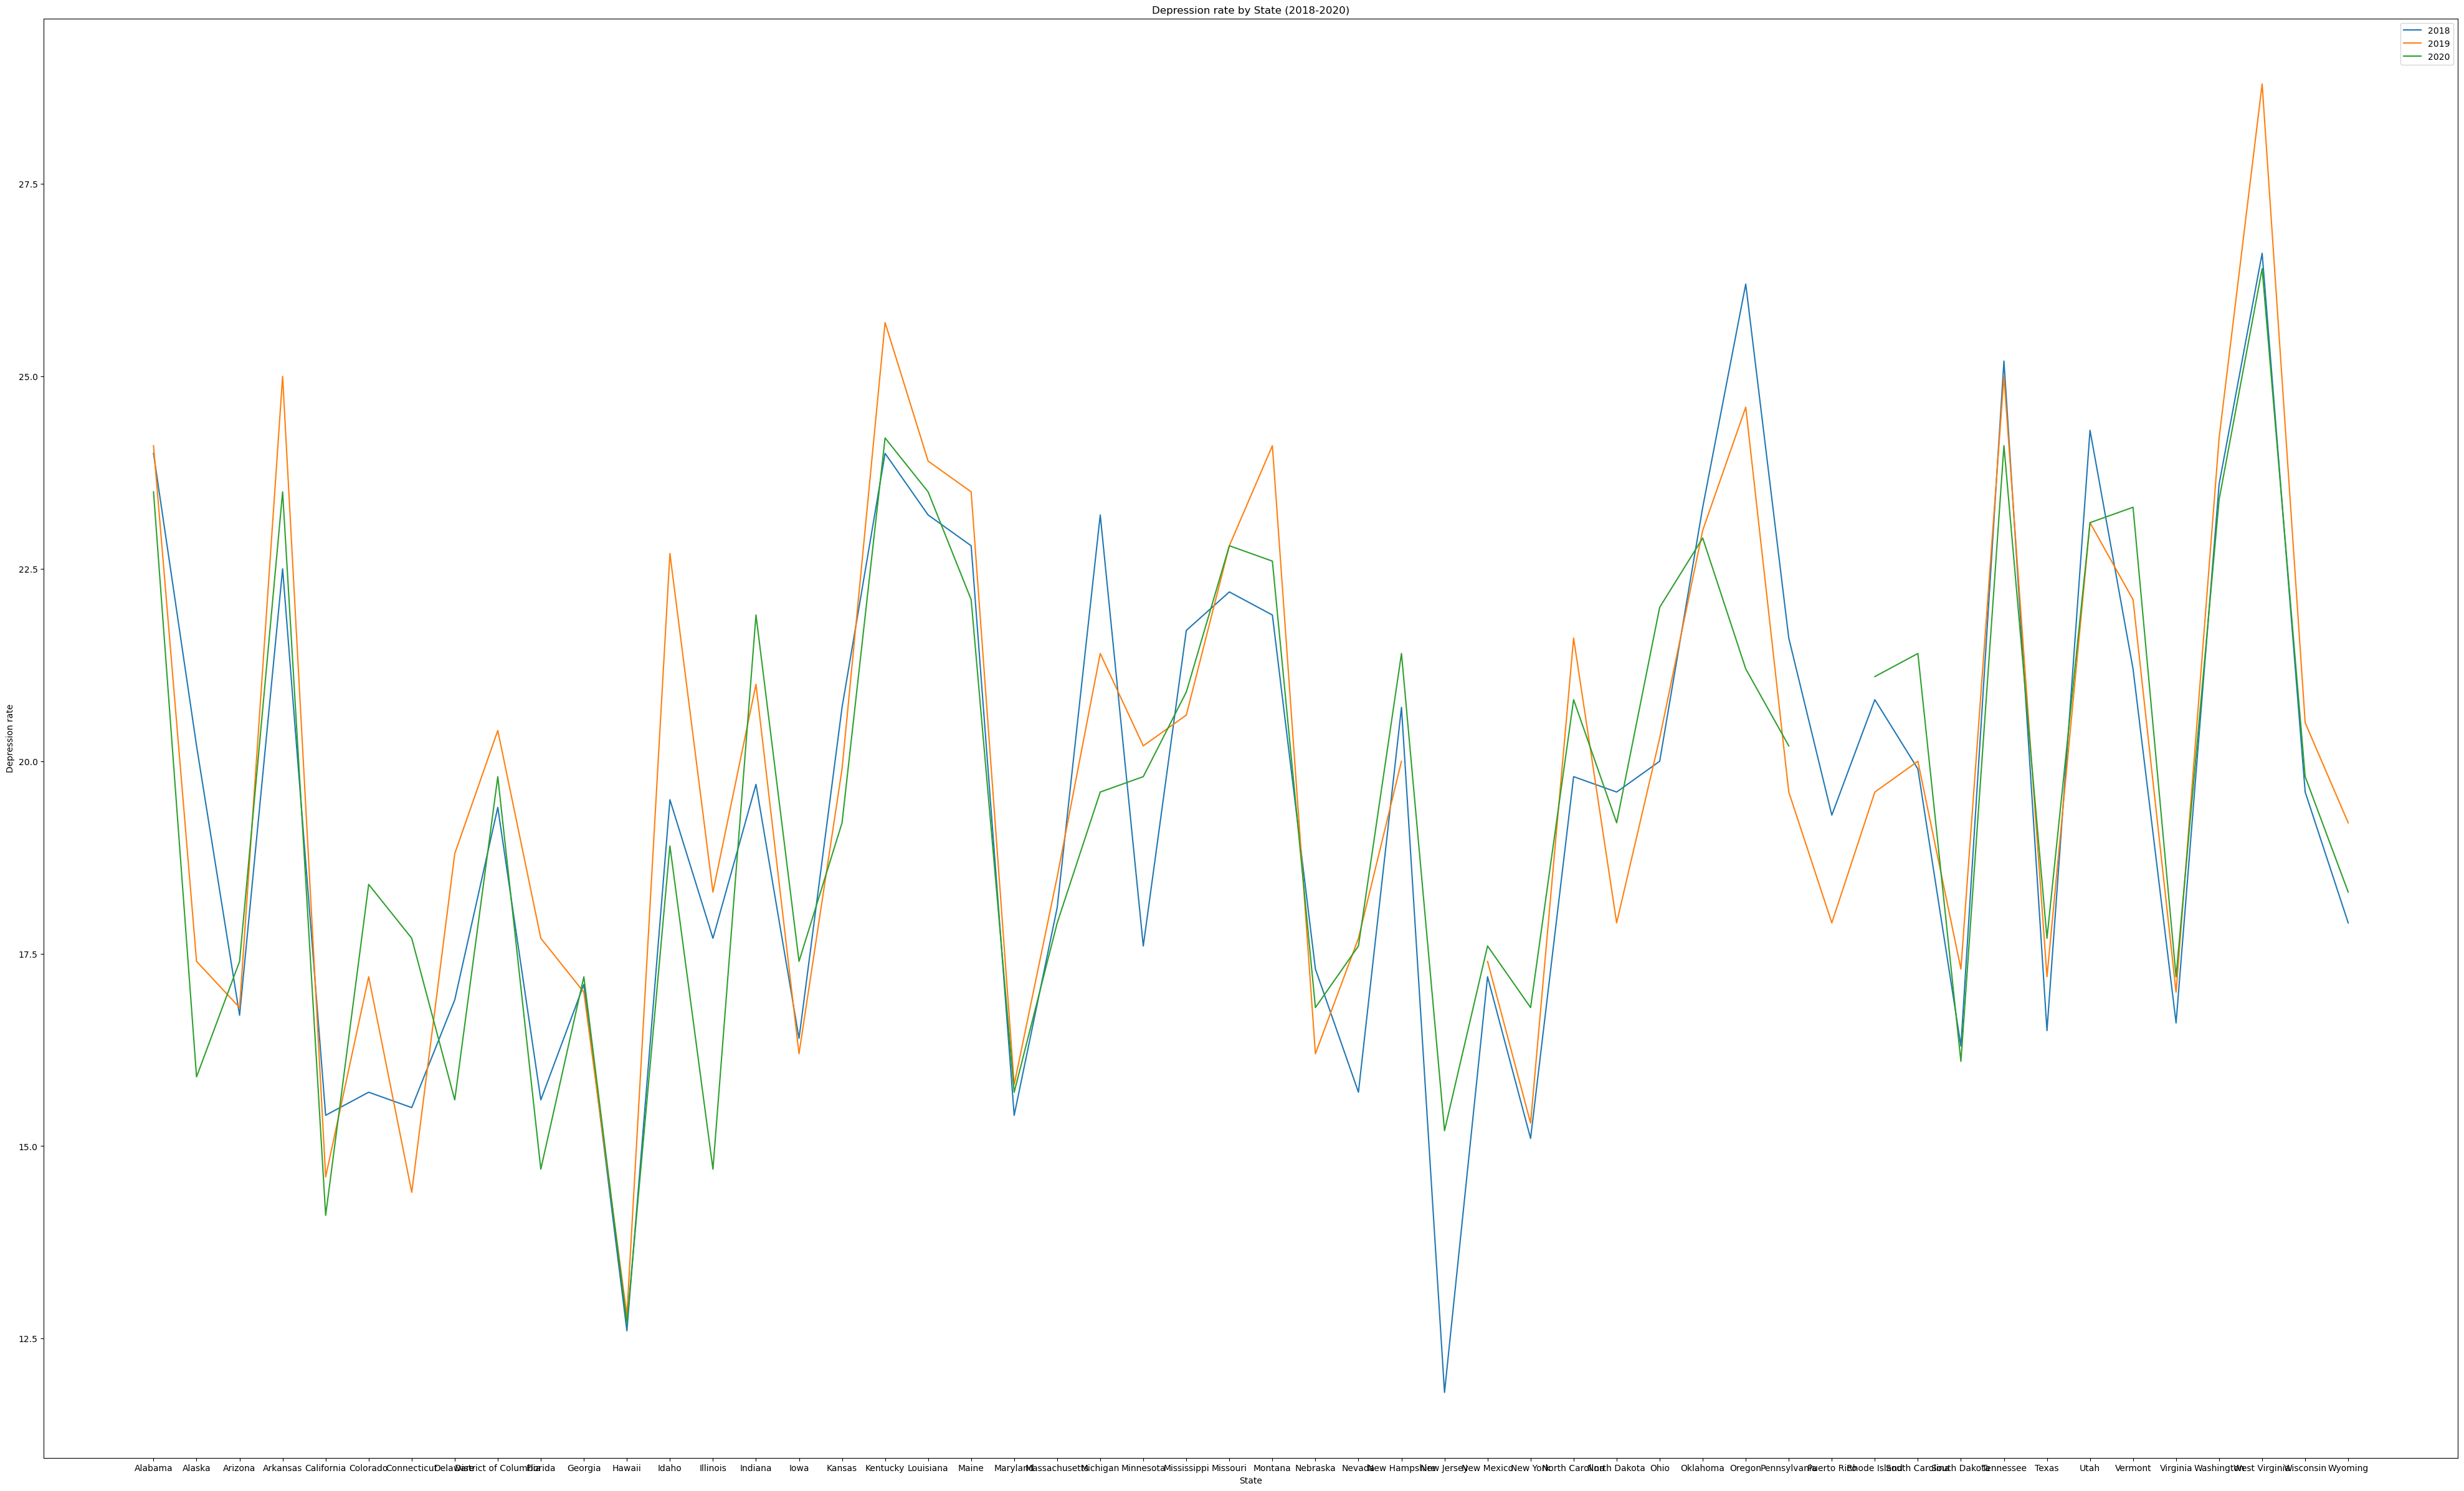

In [40]:




# Filter the data for years 2019, 2020, and 2021
years = [2018, 2019, 2020]
depression_years = depression[depression['Year'].isin(years)]

# Group the data by year and state, and calculate the mean rate
grouped = depression_years.groupby(['Year', 'State']).mean().reset_index()

# Create a line graph with three lines for each year
plt.figure(figsize=(50,30))

for year in years:
    data = grouped[grouped['Year'] == year]
    plt.plot(data['State'], data['Depression rate'], label=str(year))

plt.xlabel('State')
plt.ylabel('Depression rate')
plt.title('Depression rate by State (2018-2020)')
plt.legend()
plt.show()

In [5]:
depression_2020 = depression.loc[depression["Year"]==2020]
depression_2020 

,Year,State,Depression rate
104,2020,Alabama,23.5
105,2020,Alaska,15.9
106,2020,Arizona,17.4
107,2020,Arkansas,23.5
108,2020,California,14.1
109,2020,Colorado,18.4
110,2020,Connecticut,17.7
111,2020,Delaware,15.6
112,2020,District of Columbia,19.8
113,2020,Florida,14.7


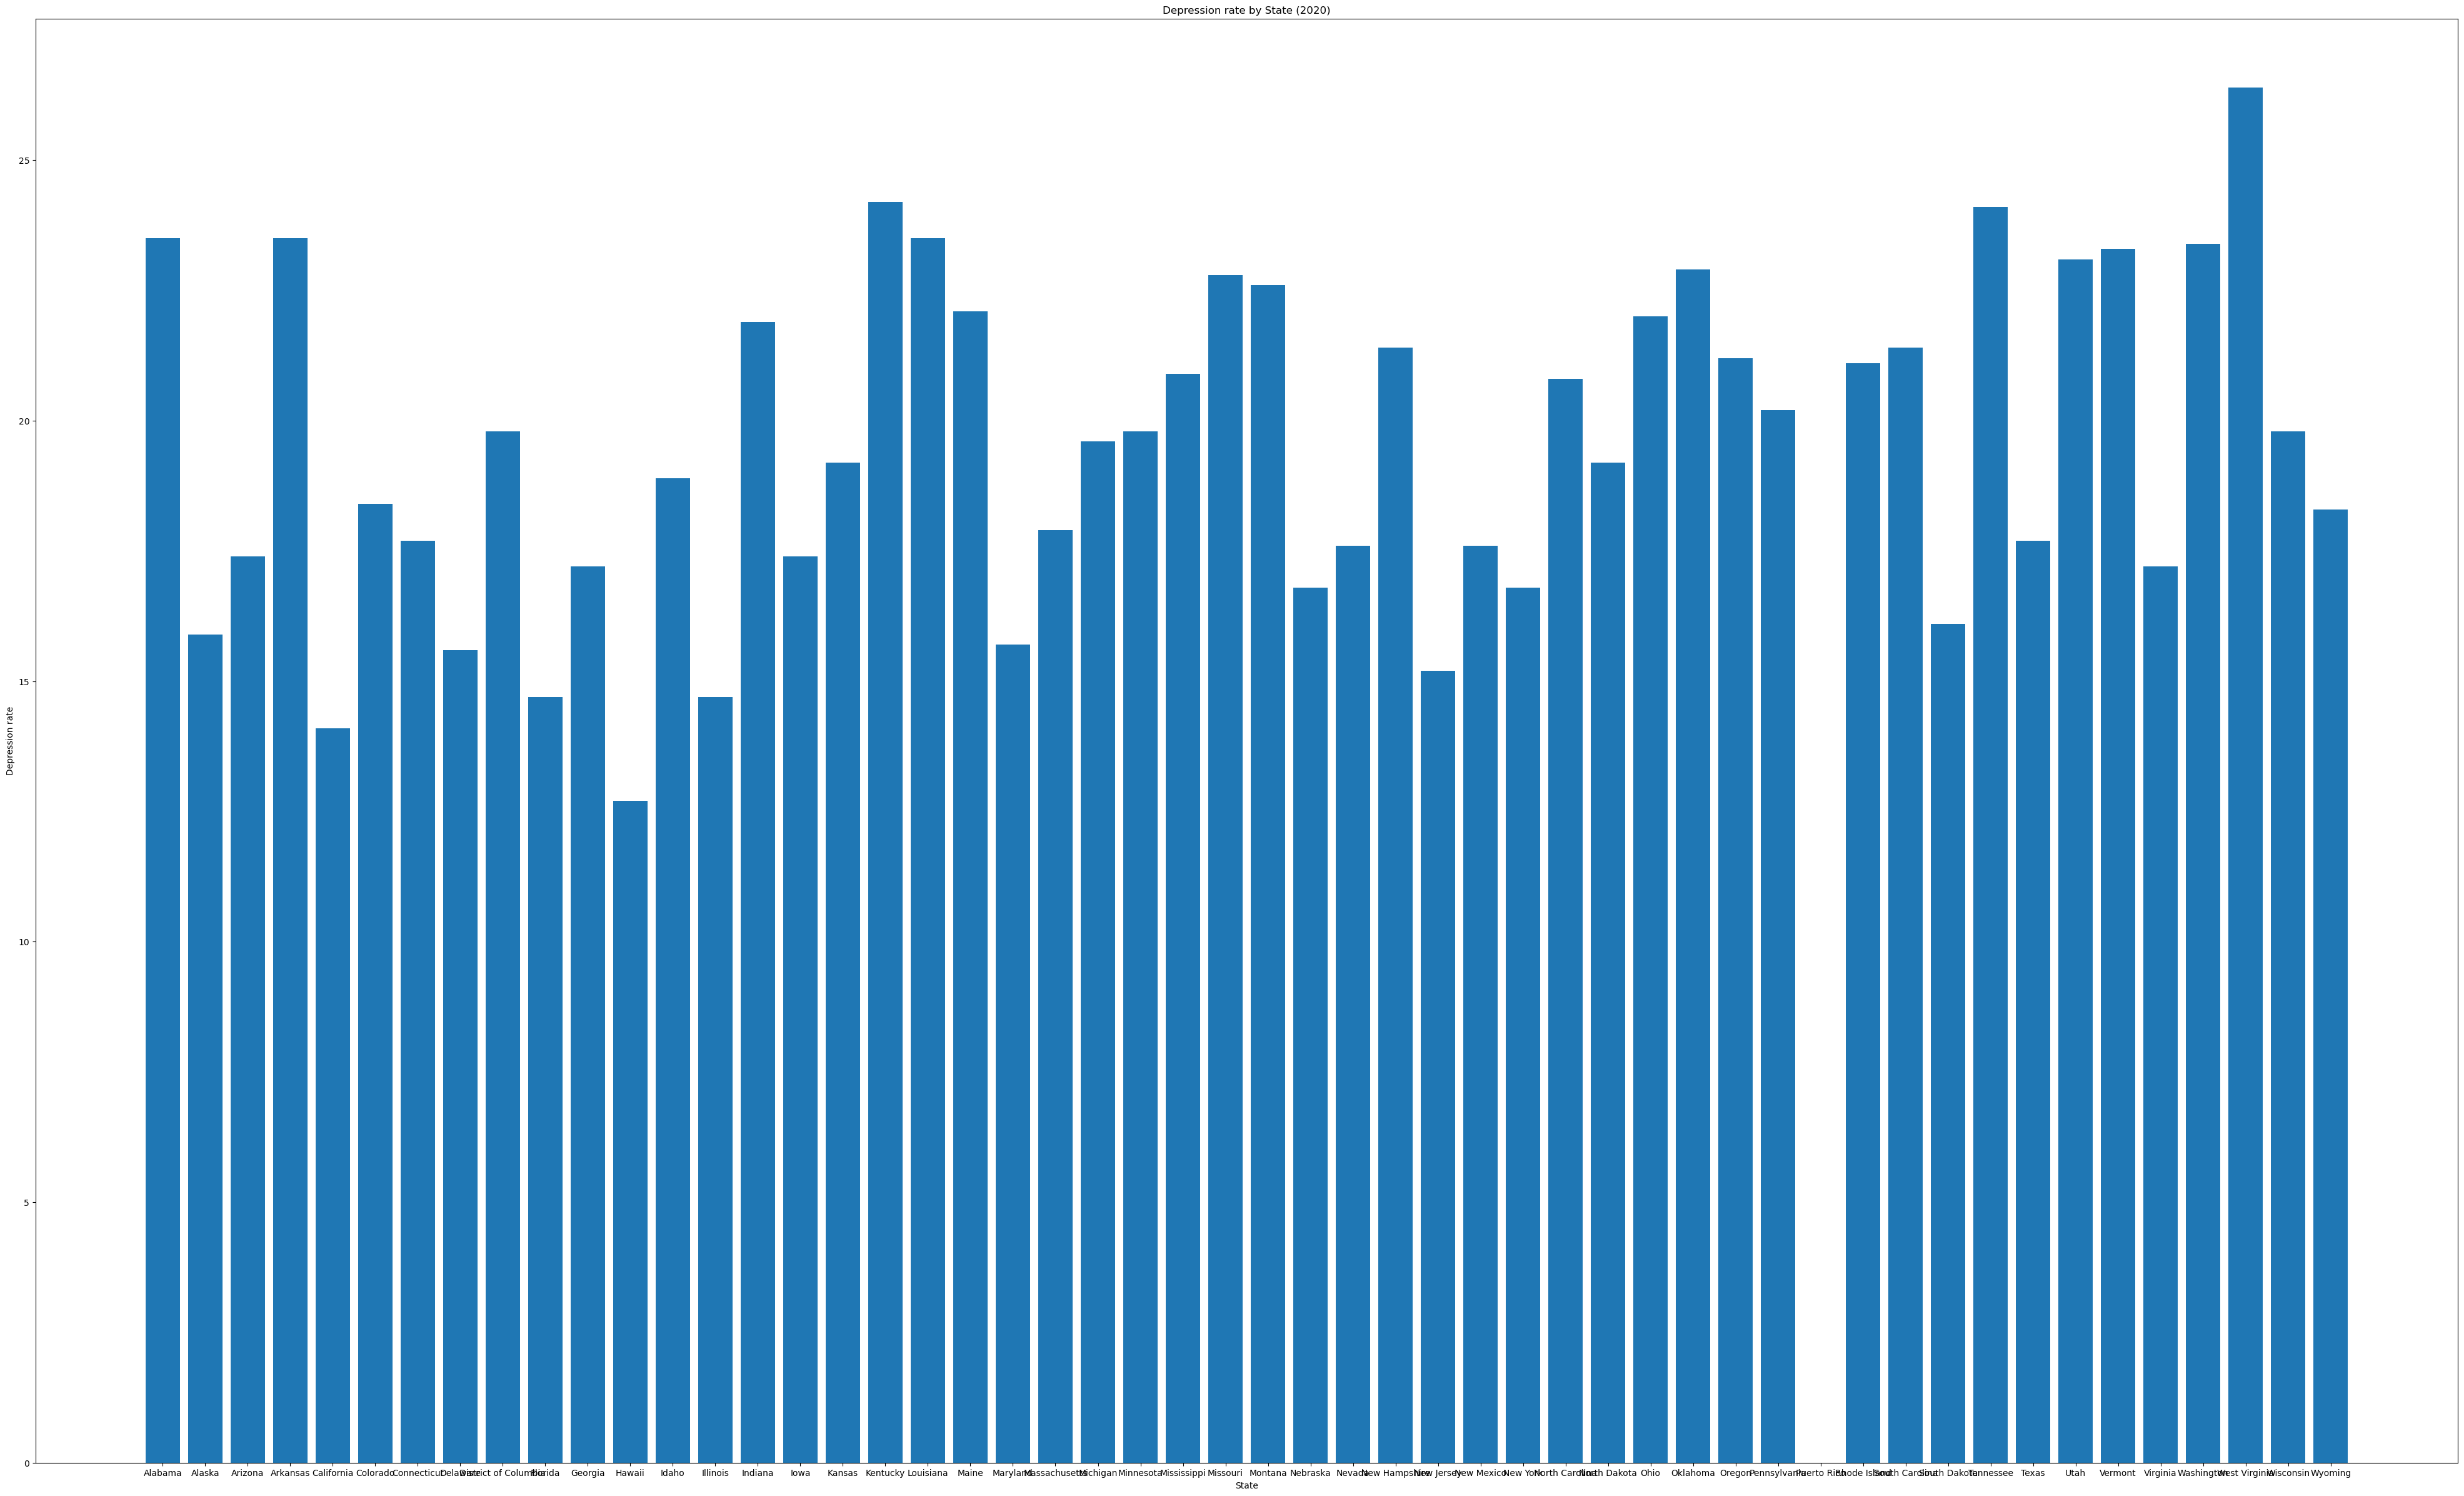

In [58]:

# Create a vertical bar chart
plt.figure(figsize=(50,30))
plt.bar(depression_2020['State'], depression_2020['Depression rate'])
plt.xlabel('State')
plt.ylabel('Depression rate')
plt.title('Depression rate by State (2020)')
plt.show()


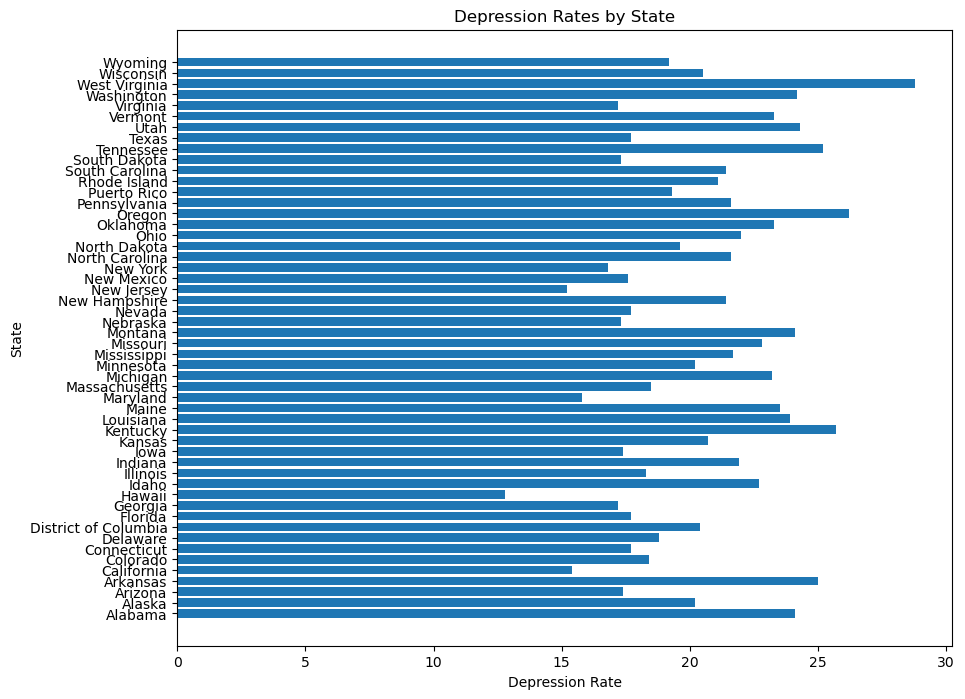

In [37]:

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(depression['State'], depression['Depression rate'], align='center')

# Add axis labels and title
ax.set_xlabel('Depression Rate')
ax.set_ylabel('State')
ax.set_title('Depression Rates by State')
grid = True
# Show the plot
plt.show()


In [32]:
depression_2020 = depression[depression['Year'] == 2020]
top_5_states_2020 = depression_2020.nlargest(5, 'Depression rate')
top_5_states_2020 


,Year,State,Depression rate
153,2020,West Virginia,26.4
121,2020,Kentucky,24.2
147,2020,Tennessee,24.1
104,2020,Alabama,23.5
107,2020,Arkansas,23.5


In [31]:
bottom_5_states_2020 = depression_2020.nsmallest(5, 'Depression rate')

bottom_5_states_2020 

,Year,State,Depression rate
115,2020,Hawaii,12.7
108,2020,California,14.1
113,2020,Florida,14.7
117,2020,Illinois,14.7
134,2020,New Jersey,15.2


In [27]:
#find the State with the higher depression rate
higher_depression_5_states = depression.nlargest(5, 'Depression rate')
higher_depression_5_states

,Year,State,Depression rate
101,2019,West Virginia,28.8
49,2018,West Virginia,26.6
153,2020,West Virginia,26.4
37,2018,Oregon,26.2
69,2019,Kentucky,25.7


In [28]:
#find the State with the lower depression rate
bottom_5_states = depression.nsmallest(5, 'Depression rate')
bottom_5_states 

,Year,State,Depression rate
30,2018,New Jersey,11.8
11,2018,Hawaii,12.6
115,2020,Hawaii,12.7
63,2019,Hawaii,12.8
108,2020,California,14.1


In [6]:
physical_activity = physical_activity.rename(columns={'YearEnd':'Year', 'Location':'State'})

In [7]:
depression_activity_df = pd.merge(depression_2020, physical_activity, on=["Year","State"], how="outer")

depression_activity_df.head()

,Year,State,Depression rate,LocationAbbr,Question,Data_Value,Low_Confidence,High_Confidence,Sample_Size,Age(years),Gender,Race/Ethnicity
0,2020,Alabama,23.5,AL,Percent of adults who engage in no leisure-tim...,34.6,31.4,38.1,1346.0,NaN,NaN,Non-Hispanic Black
1,2020,Alabama,23.5,AL,Percent of adults who engage in no leisure-tim...,22.5,18.6,26.9,576.0,25 - 34,NaN,NaN
2,2020,Alabama,23.5,AL,Percent of adults who engage in no leisure-tim...,45.9,40.0,51.8,487.0,NaN,NaN,NaN
3,2020,Alabama,23.5,AL,Percent of adults who engage in no leisure-tim...,24.2,14.1,38.5,79.0,NaN,NaN,2 or more races
4,2020,Alabama,23.5,AL,Percent of adults who engage in no leisure-tim...,34.7,31.7,37.7,1528.0,NaN,NaN,NaN


In [8]:
depression_activity_2020_no_activity_df = depression_activity_df.loc[depression_activity_df['Question'] == "Percent of adults who engage in no leisure-time physical activity"]
depression_activity_2020_no_activity_df.head()

,Year,State,Depression rate,LocationAbbr,Question,Data_Value,Low_Confidence,High_Confidence,Sample_Size,Age(years),Gender,Race/Ethnicity
0,2020,Alabama,23.5,AL,Percent of adults who engage in no leisure-tim...,34.6,31.4,38.1,1346.0,NaN,NaN,Non-Hispanic Black
1,2020,Alabama,23.5,AL,Percent of adults who engage in no leisure-tim...,22.5,18.6,26.9,576.0,25 - 34,NaN,NaN
2,2020,Alabama,23.5,AL,Percent of adults who engage in no leisure-tim...,45.9,40.0,51.8,487.0,NaN,NaN,NaN
3,2020,Alabama,23.5,AL,Percent of adults who engage in no leisure-tim...,24.2,14.1,38.5,79.0,NaN,NaN,2 or more races
4,2020,Alabama,23.5,AL,Percent of adults who engage in no leisure-tim...,34.7,31.7,37.7,1528.0,NaN,NaN,NaN


In [9]:
Value_by_gender_2020 = depression_activity_2020_no_activity_df[["Data_Value","Sample_Size","Gender","State"]]
Value_by_gender_2020.head()

,Data_Value,Sample_Size,Gender,State
0,34.6,1346.0,NaN,Alabama
1,22.5,576.0,NaN,Alabama
2,45.9,487.0,NaN,Alabama
3,24.2,79.0,NaN,Alabama
4,34.7,1528.0,NaN,Alabama


In [10]:
Value_by_gender_2020 = Value_by_gender_2020.dropna().set_index("State")
Value_by_gender_2020

,Data_Value,Sample_Size,Gender
State,,,
Alabama,25.2,2171.0,Male
Alabama,32.1,3165.0,Female
Alaska,24.7,1851.0,Female
Alaska,18.2,1810.0,Male
Arizona,20.4,4755.0,Male
...,...,...,...
Guam,29.4,827.0,Male
Oregon,17.9,2589.0,Male
Oregon,21.9,2781.0,Female


In [11]:
Value_by_gender_2020["no_physical_activity"] = Value_by_gender_2020["Data_Value"] * Value_by_gender_2020["Sample_Size"] / 100
Value_by_gender_2020.head()

,Data_Value,Sample_Size,Gender,no_physical_activity
State,,,,
Alabama,25.2,2171.0,Male,547.092
Alabama,32.1,3165.0,Female,1015.965
Alaska,24.7,1851.0,Female,457.197
Alaska,18.2,1810.0,Male,329.420
Arizona,20.4,4755.0,Male,970.020


In [48]:
male_df = Value_by_gender_2020[Value_by_gender_2020['Gender'] == 'Male']
total_men_inactive = male_df['Sample_Size'].sum()
total_men_inactive

4130650.0

In [49]:
female_df = Value_by_gender_2020[Value_by_gender_2020['Gender'] == 'Female']
total_women_inactive= female_df['Sample_Size'].sum()
total_women_inactive

5470615.0

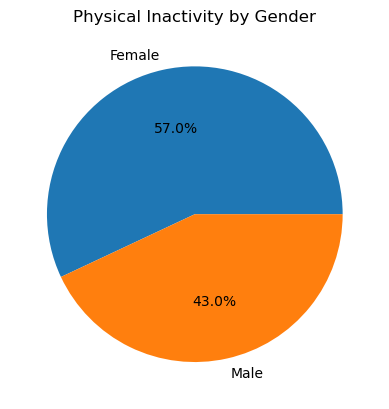

In [54]:
female_df = Value_by_gender_2020[Value_by_gender_2020['Gender'] == 'Female']
total_women_inactive= female_df['Sample_Size'].sum()
total_women_inactive
male_df = Value_by_gender_2020[Value_by_gender_2020['Gender'] == 'Male']
total_men_inactive = male_df['Sample_Size'].sum()
total_men_inactive
# Create the figure and axis
fig, ax = plt.subplots()

# Define the data labels and values
labels = ["Female", "Male"]
values = [total_women_inactive , total_men_inactive]

# Create the pie chart
ax.pie(values, labels=labels, autopct='%1.1f%%')

# Add a title
ax.set_title("Physical Inactivity by Gender")

# Show the chart
plt.show()

female_df = Value_by_gender_2020[Value_by_gender_2020['Gender'] == 'Female']
total_women = female_df['Sample_Size'].sum()
total_women

In [12]:
total_people_2020 = Value_by_gender_2020.groupby("State")["Sample_Size","no_physical_activity"].sum()
total_people_2020.head()

/var/folders/n6/xcfcnrz932b7stjvrp18cbkh0000gn/T/ipykernel_10021/3609015436.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_people_2020 = Value_by_gender_2020.groupby("State")["Sample_Size","no_physical_activity"].sum()


,Sample_Size,no_physical_activity
State,,
Alabama,74971.0,23185.483
Alaska,40373.0,8338.972
Arizona,101693.0,23796.846
Arkansas,55641.0,17975.170
California,113264.0,23221.303


In [13]:
avg_no_physical_activity_2020 = total_people_2020["no_physical_activity"] / total_people_2020["Sample_Size"] * 100

total_people_2020["avg_physical_activity"] = avg_no_physical_activity_2020

total_people_2020.head()


,Sample_Size,no_physical_activity,avg_physical_activity
State,,,
Alabama,74971.0,23185.483,30.925935
Alaska,40373.0,8338.972,20.654824
Arizona,101693.0,23796.846,23.400673
Arkansas,55641.0,17975.170,32.305620
California,113264.0,23221.303,20.501927


In [57]:
depression_2020 = depression.loc[depression['Year'] == 2020]
depression_2020
merged_depression_activity_2020_df = pd.merge(total_people_2020,depression_2020,  on=["State"], how="outer")
merged_depression_activity_2020_df.head()

,State,Sample_Size,no_physical_activity,avg_physical_activity,Year,Depression rate
0,Alabama,74971.0,23185.483,30.925935,2020.0,23.5
1,Alaska,40373.0,8338.972,20.654824,2020.0,15.9
2,Arizona,101693.0,23796.846,23.400673,2020.0,17.4
3,Arkansas,55641.0,17975.170,32.305620,2020.0,23.5
4,California,113264.0,23221.303,20.501927,2020.0,14.1


In [56]:
merged_depression_activity_2020_df = merged_depression_activity_2020_df.dropna()
merged_depression_activity_2020_df.head()


,State,Sample_Size,no_physical_activity,avg_physical_activity,Year,Depression rate
0,Alabama,74971.0,23185.483,30.925935,2020.0,23.5
1,Alaska,40373.0,8338.972,20.654824,2020.0,15.9
2,Arizona,101693.0,23796.846,23.400673,2020.0,17.4
3,Arkansas,55641.0,17975.170,32.305620,2020.0,23.5
4,California,113264.0,23221.303,20.501927,2020.0,14.1


Text(0, 0.5, 'Depression rate')

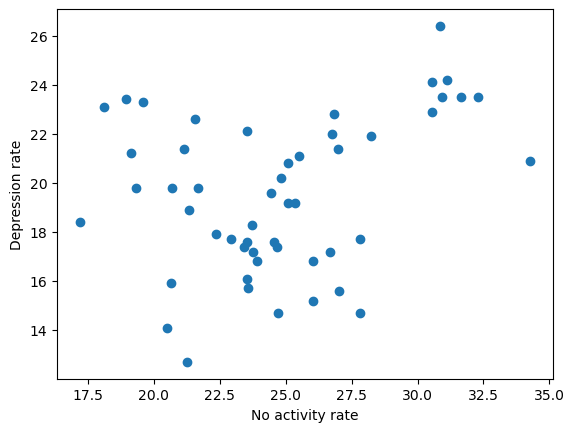

In [16]:
# Generate a scatter plot
depression_rate = merged_depression_activity_2020_df["Depression rate"]
no_activity_rate = merged_depression_activity_2020_df["avg_physical_activity"]
plt.scatter(no_activity_rate, depression_rate)
plt.xlabel('No activity rate')
plt.ylabel('Depression rate')

The r-value is: 0.09997846965630257


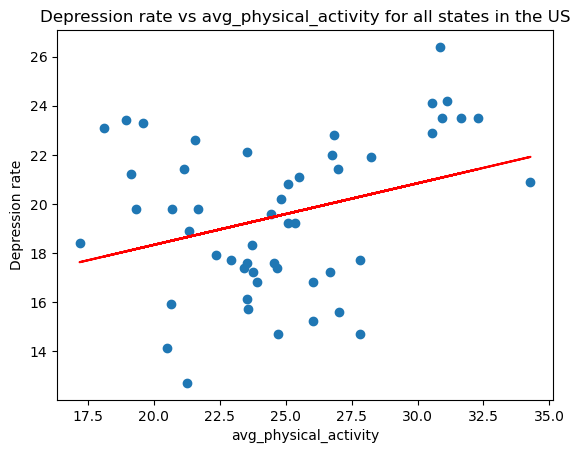

In [23]:


def linear_regression(df, x_col_name, y_col_name, coord):

    # Define a function to create Linear Regression plots
    x_values = df[x_col_name]
    y_values = df[y_col_name]

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel(x_col_name)
    plt.ylabel(y_col_name)
    plt.title(f"{y_col_name} vs {x_col_name} for all states in the US")
    plt.annotate(line_eq, coord, fontsize=15,color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

# Linear regression 
# Perform a linear regression on suicide rate vs no activity rate
linear_regression(merged_depression_activity_2020_df , "avg_physical_activity", "Depression rate", (0,35))


The r-value is: 0.09997846965630257


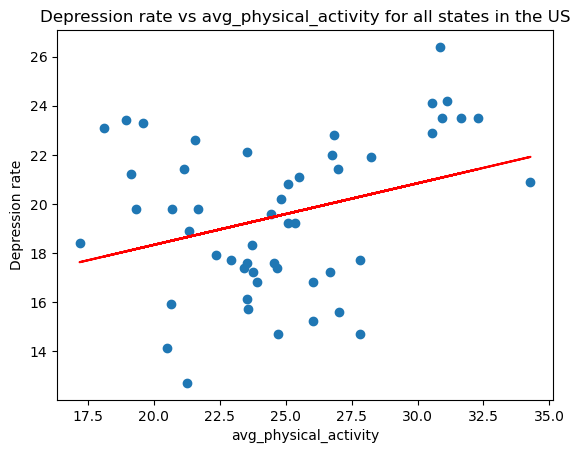

In [18]:
def linear_regression(df, x_col_name, y_col_name, coord):

    # Define a function to create Linear Regression plots
    x_values = df[x_col_name]
    y_values = df[y_col_name]

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel(x_col_name)
    plt.ylabel(y_col_name)
    plt.title(f"{y_col_name} vs {x_col_name} for all states in the US")
    plt.annotate(line_eq, coord, fontsize=15,color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

# Linear regression 
# Perform a linear regression on depression rate vs no activity rate
linear_regression(merged_depression_activity_2020_df , "avg_physical_activity", "Depression rate", (25,9))